In [172]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [173]:
refresh_rates = [
    "0.5",
    "1.0",
    "5.0",
    "10.0",
    "15.0",
    "24.0",
    "30.0",
    "60.0",
    "100.0"
]

In [174]:
average_task_times = []
average_task_distances = []

for refresh_rate in refresh_rates:
    trial1_df = pd.read_csv(f"test_data/arm-hand-refresh-rate-{refresh_rate}-trial-0.csv")
    trial2_df = pd.read_csv(f"test_data/arm-hand-refresh-rate-{refresh_rate}-trial-1.csv")

    average_task_time = (trial1_df[trial1_df.columns[0]].values[-1] + trial2_df[trial2_df.columns[0]].values[-1]) / 2
    average_task_times.append(average_task_time)

    trial1_df = trial1_df[:-1]
    trial2_df = trial2_df[:-1]

    distance1, distance2 = 0, 0
    for i in range(len(trial1_df) - 1):
        x_dist = trial1_df.iloc[i]["end_effector_x"] - trial1_df.iloc[i + 1]["end_effector_x"]
        y_dist = trial1_df.iloc[i]["end_effector_y"] - trial1_df.iloc[i + 1]["end_effector_y"]
        z_dist = trial1_df.iloc[i]["end_effector_z"] - trial1_df.iloc[i + 1]["end_effector_z"]
        distance1 += np.sqrt(x_dist ** 2 + y_dist ** 2 + z_dist ** 2)

    for i in range(len(trial2_df) - 1):
        x_dist = trial2_df.iloc[i]["end_effector_x"] - trial2_df.iloc[i + 1]["end_effector_x"]
        y_dist = trial2_df.iloc[i]["end_effector_y"] - trial2_df.iloc[i + 1]["end_effector_y"]
        z_dist = trial2_df.iloc[i]["end_effector_z"] - trial2_df.iloc[i + 1]["end_effector_z"]
        distance2 += np.sqrt(x_dist ** 2 + y_dist ** 2 + z_dist ** 2)

    average_task_distances.append((distance1 + distance2) / 2)

print(average_task_times)
print(average_task_distances)

[128.1755940914154, 119.5292364358902, 104.3184461593628, 94.0472582578659, 75.35432636737823, 70.76879489421844, 57.86664175987244, 57.66424822807312, 58.15941631793976]
[12.78825241870006, 12.03822655525557, 11.781183870786517, 10.96020639560368, 8.876760402666278, 8.361578443584902, 7.571067722254619, 7.206694908129692, 7.110728296295534]


C:\Users\aashv\AppData\Local\Temp\ipykernel_25824\2370335092.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


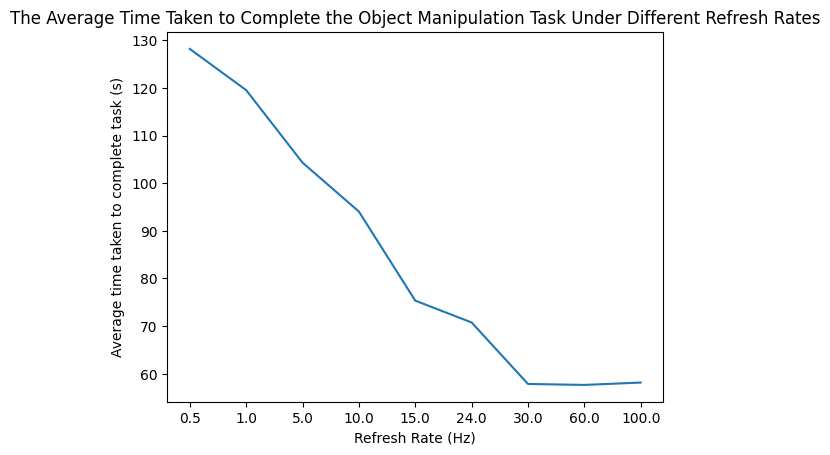

In [175]:
x = np.array([i for i in range(len(refresh_rates))])
fig, ax = plt.subplots()
plt.plot(average_task_times)
plt.xlabel("Refresh Rate (Hz)")
plt.ylabel("Average time taken to complete task (s)")
plt.title("The Average Time Taken to Complete the Object Manipulation Task Under Different Refresh Rates")

labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(len(refresh_rates)):
    labels[i + 1] = refresh_rates[i]

ax.set_xticklabels(labels)

plt.show()

C:\Users\aashv\AppData\Local\Temp\ipykernel_25824\753486900.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


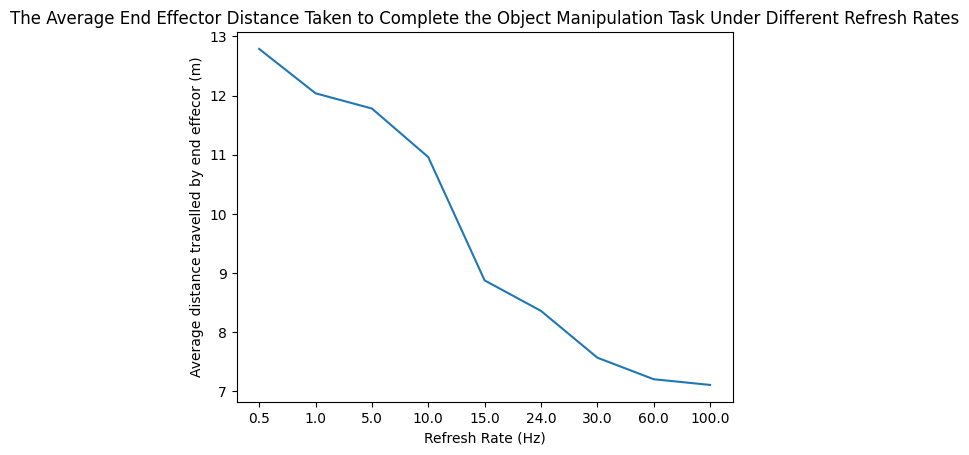

In [176]:
x = np.array([i for i in range(len(refresh_rates))])
fig, ax = plt.subplots()
plt.plot(average_task_distances)
plt.xlabel("Refresh Rate (Hz)")
plt.ylabel("Average distance travelled by end effecor (m)")
plt.title("The Average End Effector Distance Taken to Complete the Object Manipulation Task Under Different Refresh Rates")

labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(len(refresh_rates)):
    labels[i + 1] = refresh_rates[i]

ax.set_xticklabels(labels)

plt.show()